In [58]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, AvgPool2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [59]:
train_dir="D:\\AI Project\\lung cancer\\data\\train"
test_dir="D:\\AI Project\\lung cancer\\data\\test"

datagn=ImageDataGenerator(rescale=1/255,validation_split=0.2,zoom_range=.7,shear_range=.2,rotation_range=.3)
test_datagn=ImageDataGenerator(rescale=1/255)


train_set=datagn.flow_from_directory(
    train_dir,
    target_size=(224,224),
    batch_size=4,
    class_mode="categorical",
    subset="training"
    )

valid_set=datagn.flow_from_directory(
    train_dir,
    target_size=(224,224),
    batch_size=4,
    class_mode="categorical",
    subset="validation"
)

test_set=test_datagn.flow_from_directory(
    test_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode="categorical"
)

Found 824 images belonging to 3 classes.


Found 204 images belonging to 3 classes.
Found 95 images belonging to 3 classes.


In [60]:
from keras.mixed_precision import set_global_policy
set_global_policy('mixed_float16')  # Uses float16 for calculations where possible

In [61]:
train_set.class_indices

{'Bengin cases': 0, 'Malignant cases': 1, 'Normal cases': 2}

In [62]:
labels=['benign','malignant','Normal']
print(labels)

['benign', 'malignant', 'Normal']


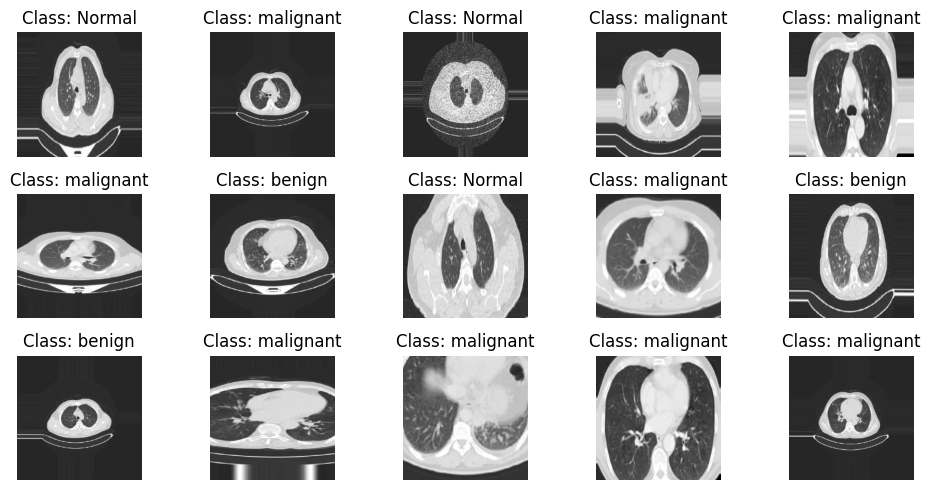

In [63]:
plt.figure(figsize=(10, 5))

for i in range(15):  
    plt.subplot(3, 5, i+1) 
    image, label = train_set.next()  
    plt.imshow(image[0])  
    plt.axis("off")  
    plt.title(f"Class: {labels[np.argmax(label)]}") 

plt.tight_layout()  
plt.show()

In [64]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224,224,3))
for layer in base_model.layers:
    layer.trainable = False

# Add new top layers for our specific classification problem
x = base_model.output
x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dense(3, activation='softmax')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=x)

In [70]:
# Compile the model
model = Model(inputs=base_model.input, outputs=x)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_set,
                    epochs=30,
                    validation_data=valid_set,
                    verbose=1)

print("Training accuracy:", history.history['accuracy'][-1])
print("Validation accuracy:", history.history['val_accuracy'][-1])

Epoch 1/30
206/206 [==============================] - 10s 46ms/step - loss: 0.1998 - accuracy: 0.9345 - val_loss: 1.0029 - val_accuracy: 0.8039
Epoch 2/30
206/206 [==============================] - 10s 46ms/step - loss: 0.1460 - accuracy: 0.9430 - val_loss: 1.0090 - val_accuracy: 0.7255
Epoch 3/30
206/206 [==============================] - 9s 45ms/step - loss: 0.0939 - accuracy: 0.9660 - val_loss: 0.7872 - val_accuracy: 0.8137
Epoch 4/30
206/206 [==============================] - 9s 45ms/step - loss: 0.0860 - accuracy: 0.9672 - val_loss: 0.8088 - val_accuracy: 0.8186
Epoch 5/30
206/206 [==============================] - 11s 53ms/step - loss: 0.1042 - accuracy: 0.9587 - val_loss: 1.1927 - val_accuracy: 0.7304
Epoch 6/30
206/206 [==============================] - 11s 53ms/step - loss: 0.0859 - accuracy: 0.9660 - val_loss: 0.9112 - val_accuracy: 0.7549
Epoch 7/30
206/206 [==============================] - 10s 51ms/step - loss: 0.1073 - accuracy: 0.9684 - val_loss: 1.1449 - val_accuracy: 0

In [72]:
test_loss,test_acc=model.evaluate(test_set)
print(test_acc)

3/3 [==============================] - 1s 89ms/step - loss: 0.6929 - accuracy: 0.8526
0.8526315689086914


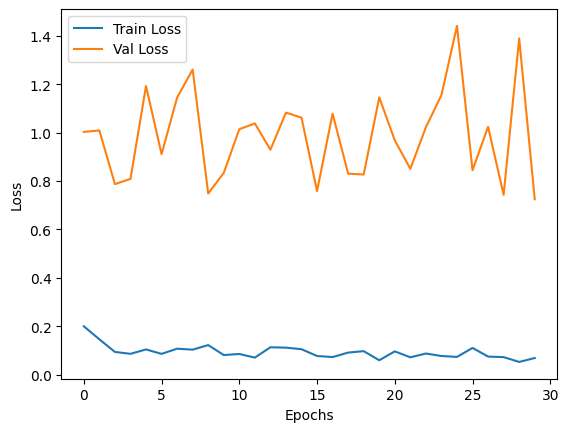

In [79]:
plt.plot(history.history['loss'], label = 'Train Loss')
plt.plot(history.history['val_loss'], label = 'Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc = 'best')
plt.show()

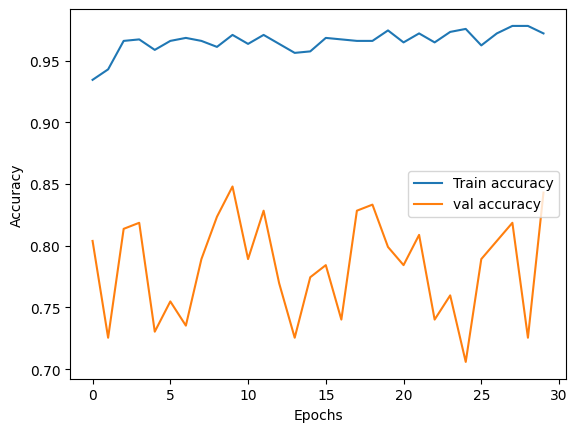

In [80]:
plt.plot(history.history['accuracy'], label = 'Train accuracy')
plt.plot(history.history['val_accuracy'], label = 'val accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc = 'best')
plt.show()

In [74]:
model.save("lung_cancer_1.h5")